In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.decomposition import PCA

In [2]:
df_fraud = pd.read_csv("Automobile_insurance_fraud.csv")
df_fraud

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df_fraud.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [4]:
df_fraud.shape

(1000, 40)

In [5]:
label_encoder = preprocessing.LabelEncoder()

In [6]:
df_fraud['auto_model']=label_encoder.fit_transform(df_fraud['auto_model'])

In [7]:
df_fraud['auto_model'].unique()

array([ 1, 12, 30, 34, 31,  3, 29,  5,  9, 14,  4, 18, 27, 23, 26, 21, 33,
       19, 15, 13, 11,  0,  7, 36, 22, 37, 10, 28, 32,  8,  2,  6, 38, 25,
       16, 20, 24, 35, 17])

In [8]:
df_fraud['auto_make']=label_encoder.fit_transform(df_fraud['auto_make'])

In [9]:
df_fraud['auto_year']=label_encoder.fit_transform(df_fraud['auto_year'])

In [10]:
df_fraud['insured_education_level']=label_encoder.fit_transform(df_fraud['insured_education_level'])
df_fraud['insured_occupation']=label_encoder.fit_transform(df_fraud['insured_occupation'])
df_fraud['insured_sex']=label_encoder.fit_transform(df_fraud['insured_sex'])
df_fraud['insured_hobbies']=label_encoder.fit_transform(df_fraud['insured_hobbies'])
df_fraud['insured_relationship']=label_encoder.fit_transform(df_fraud['insured_relationship'])
df_fraud['incident_type']=label_encoder.fit_transform(df_fraud['incident_type'])
df_fraud['collision_type']=label_encoder.fit_transform(df_fraud['collision_type'])
df_fraud['incident_severity']=label_encoder.fit_transform(df_fraud['incident_severity'])
df_fraud['authorities_contacted']=label_encoder.fit_transform(df_fraud['authorities_contacted'])

In [11]:
df_fraud['authorities_contacted']=label_encoder.fit_transform(df_fraud['authorities_contacted'])
df_fraud['incident_state']=label_encoder.fit_transform(df_fraud['incident_state'])
df_fraud['incident_city']=label_encoder.fit_transform(df_fraud['incident_city'])
df_fraud['incident_city']=label_encoder.fit_transform(df_fraud['incident_city'])
df_fraud['incident_location']=label_encoder.fit_transform(df_fraud['incident_location'])
df_fraud['property_damage']=label_encoder.fit_transform(df_fraud['property_damage'])
df_fraud['police_report_available']=label_encoder.fit_transform(df_fraud['police_report_available'])

In [12]:
df_fraud.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int64
insured_education_level          int64
insured_occupation               int64
insured_hobbies                  int64
insured_relationship             int64
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                    int64
collision_type                   int64
incident_severity                int64
authorities_contacted            int64
incident_state                   int64
incident_city                    int64
incident_location                int64
incident_hour_of_the_day 

In [13]:
df_fraud

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,71610,6510,13020,52080,10,1,9,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,5070,780,780,3510,8,12,12,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,1,34650,7700,3850,23100,4,30,12,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,1,63400,6340,6340,50720,3,34,19,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,6500,1300,650,4550,0,31,14,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,0,87200,17440,8720,61040,6,6,11,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,0,108480,18080,18080,72320,13,28,20,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,2,67500,7500,7500,52500,11,19,1,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,2,46980,5220,5220,36540,1,5,3,N,NaN


In [14]:
df_fraud['policy_state']=label_encoder.fit_transform(df_fraud['policy_state'])

In [15]:
df_fraud

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,2,250/500,1000,1406.91,0,466132,...,2,71610,6510,13020,52080,10,1,9,Y,NaN
1,228,42,342868,27-06-2006,1,250/500,2000,1197.22,5000000,468176,...,0,5070,780,780,3510,8,12,12,Y,NaN
2,134,29,687698,06-09-2000,2,100/300,2000,1413.14,5000000,430632,...,1,34650,7700,3850,23100,4,30,12,N,NaN
3,256,41,227811,25-05-1990,0,250/500,2000,1415.74,6000000,608117,...,1,63400,6340,6340,50720,3,34,19,Y,NaN
4,228,44,367455,06-06-2014,0,500/1000,1000,1583.91,6000000,610706,...,1,6500,1300,650,4550,0,31,14,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,2,500/1000,1000,1310.80,0,431289,...,0,87200,17440,8720,61040,6,6,11,N,NaN
996,285,41,186934,05-01-2014,0,100/300,1000,1436.79,0,608177,...,0,108480,18080,18080,72320,13,28,20,N,NaN
997,130,34,918516,17-02-2003,2,250/500,500,1383.49,3000000,442797,...,2,67500,7500,7500,52500,11,19,1,N,NaN
998,458,62,533940,18-11-2011,0,500/1000,2000,1356.92,5000000,441714,...,2,46980,5220,5220,36540,1,5,3,N,NaN


In [16]:
df_fraud.isna().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [17]:
df_fraud['policy_csl']=label_encoder.fit_transform(df_fraud['policy_csl'])

In [18]:
df_fraud

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,2,1,1000,1406.91,0,466132,...,2,71610,6510,13020,52080,10,1,9,Y,NaN
1,228,42,342868,27-06-2006,1,1,2000,1197.22,5000000,468176,...,0,5070,780,780,3510,8,12,12,Y,NaN
2,134,29,687698,06-09-2000,2,0,2000,1413.14,5000000,430632,...,1,34650,7700,3850,23100,4,30,12,N,NaN
3,256,41,227811,25-05-1990,0,1,2000,1415.74,6000000,608117,...,1,63400,6340,6340,50720,3,34,19,Y,NaN
4,228,44,367455,06-06-2014,0,2,1000,1583.91,6000000,610706,...,1,6500,1300,650,4550,0,31,14,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,2,2,1000,1310.80,0,431289,...,0,87200,17440,8720,61040,6,6,11,N,NaN
996,285,41,186934,05-01-2014,0,0,1000,1436.79,0,608177,...,0,108480,18080,18080,72320,13,28,20,N,NaN
997,130,34,918516,17-02-2003,2,1,500,1383.49,3000000,442797,...,2,67500,7500,7500,52500,11,19,1,N,NaN
998,458,62,533940,18-11-2011,0,2,2000,1356.92,5000000,441714,...,2,46980,5220,5220,36540,1,5,3,N,NaN


In [19]:
df_fraud['incident_date']=label_encoder.fit_transform(df_fraud['incident_date'])

In [20]:
df_fraud['fraud_reported']=label_encoder.fit_transform(df_fraud['fraud_reported'])

In [21]:
df_fraud['policy_bind_date']=label_encoder.fit_transform(df_fraud['policy_bind_date'])

In [22]:
df_fraud.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                 int64
policy_state                     int64
policy_csl                       int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int64
insured_education_level          int64
insured_occupation               int64
insured_hobbies                  int64
insured_relationship             int64
capital-gains                    int64
capital-loss                     int64
incident_date                    int64
incident_type                    int64
collision_type                   int64
incident_severity                int64
authorities_contacted            int64
incident_state                   int64
incident_city                    int64
incident_location                int64
incident_hour_of_the_day 

In [23]:
df_fraud['_c39']=label_encoder.fit_transform(df_fraud['_c39'])

In [24]:
df_fraud

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,71610,6510,13020,52080,10,1,9,1,0
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,5070,780,780,3510,8,12,12,1,657
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,1,34650,7700,3850,23100,4,30,12,0,658
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,1,63400,6340,6340,50720,3,34,19,1,659
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,6500,1300,650,4550,0,31,14,0,660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,0,87200,17440,8720,61040,6,6,11,0,337
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,0,108480,18080,18080,72320,13,28,20,0,338
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,2,67500,7500,7500,52500,11,19,1,0,339
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,2,46980,5220,5220,36540,1,5,3,0,936


In [25]:
df_fraud.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                 int64
policy_state                     int64
policy_csl                       int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int64
insured_education_level          int64
insured_occupation               int64
insured_hobbies                  int64
insured_relationship             int64
capital-gains                    int64
capital-loss                     int64
incident_date                    int64
incident_type                    int64
collision_type                   int64
incident_severity                int64
authorities_contacted            int64
incident_state                   int64
incident_city                    int64
incident_location                int64
incident_hour_of_the_day 

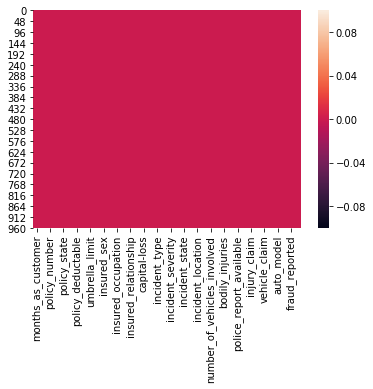

In [26]:
sns.heatmap(df_fraud.isnull())

In [27]:
df_fraud.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,...,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,10.103000,0.247000,499.500000
std,115.113174,9.140287,257063.005276,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,...,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483,288.819436
min,0.000000,19.000000,100804.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,115.750000,32.000000,335980.250000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,...,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,5.000000,0.000000,249.750000
50%,199.500000,38.000000,533135.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,10.000000,0.000000,499.500000
75%,276.250000,44.000000,759099.750000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,15.000000,0.000000,749.250000
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,...,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,20.000000,1.000000,999.000000


In [28]:
df_fraud.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


In [29]:
from scipy.stats import zscore
z_score=abs(zscore(df_fraud))
print(df_fraud.shape)
df_fraud_new=df_fraud.loc[(z_score<3).all(axis=1)]
print(df_fraud_new.shape)

(1000, 40)
(980, 40)


In [30]:
df_x=df_fraud_new.drop(columns=["fraud_reported"])
y=df_fraud_new[["fraud_reported"]]

In [31]:
df_x

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,_c39
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,2,71610,6510,13020,52080,10,1,9,0
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,0,5070,780,780,3510,8,12,12,657
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,1,34650,7700,3850,23100,4,30,12,658
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,1,63400,6340,6340,50720,3,34,19,659
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,1,6500,1300,650,4550,0,31,14,660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,0,87200,17440,8720,61040,6,6,11,337
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,3,0,108480,18080,18080,72320,13,28,20,338
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,3,2,67500,7500,7500,52500,11,19,1,339
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,2,46980,5220,5220,36540,1,5,3,936


In [32]:
y

,fraud_reported
0,1
1,1
2,0
3,1
4,0
...,...
995,0
996,0
997,0
998,0


In [33]:
sc = StandardScaler()
x = sc.fit_transform(df_x)
x = pd.DataFrame(x,columns=df_x.columns)

In [34]:
x

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,_c39
0,1.069568,0.983352,-0.095774,0.212074,1.179821,0.067231,-0.224643,0.620031,-0.467878,-0.484014,...,0.466378,1.266345,0.718507,-0.187627,1.176015,0.753824,0.851959,-1.640447,-0.188594,-1.725239
1,0.202726,0.329711,-0.790245,1.259905,-0.024580,0.067231,1.412161,-0.248448,1.890767,-0.455363,...,-1.333033,-1.205803,-1.808821,-1.361005,-1.378984,-1.824679,0.355279,-0.651740,0.310476,0.548062
2,-0.612105,-1.086511,0.549720,-1.042421,1.179821,-1.175916,1.412161,0.645834,1.890767,-0.981629,...,1.366083,0.030271,-0.685311,0.056059,-0.738147,-0.784678,-0.638083,0.966145,0.310476,0.551522
3,0.445442,0.220771,-1.237342,1.060491,-1.228980,0.067231,1.412161,0.656603,2.362496,1.506233,...,0.466378,0.030271,0.406674,-0.222439,-0.218380,0.681623,-0.886423,1.325675,1.474975,0.554983
4,0.202726,0.547591,-0.694703,-1.060550,-1.228980,1.310379,-0.224643,1.353117,2.362496,1.542524,...,-0.433327,0.030271,-1.754507,-1.254521,-1.406121,-1.769467,-1.631444,1.056027,0.643190,0.558443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,-1.747669,-0.106050,1.537326,0.048917,1.179821,1.310379,-0.224643,0.221970,-0.467878,-0.972419,...,-0.433327,-1.205803,1.310648,2.050597,0.278425,1.229496,-0.141402,-1.191035,0.144119,-0.559177
976,0.696826,0.220771,-1.396184,-1.249087,-1.228980,-1.175916,-0.224643,0.743786,-0.467878,1.507074,...,1.366083,-1.205803,2.118906,2.181655,2.232248,1.828332,1.596980,0.786380,1.641332,-0.555717
977,-0.646779,-0.541810,1.446649,0.128683,1.179821,0.067231,-1.043045,0.523032,0.947309,-0.811108,...,1.366083,1.266345,0.562400,0.015103,0.023760,0.776121,1.100300,-0.022562,-1.519450,-0.552257
978,2.196463,2.508513,-0.047764,0.360729,-1.228980,1.310379,1.412161,0.412986,1.890767,-0.826289,...,-0.433327,1.266345,-0.216992,-0.451791,-0.452171,-0.071170,-1.383104,-1.280917,-1.186736,1.513437


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=20,stratify=y)

In [36]:
print(x_train.shape,x_test.shape)

(784, 39) (196, 39)


In [37]:
print(y_train.shape,y_test.shape)

(784, 1) (196, 1)


In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [39]:
KNN=KNeighborsClassifier(n_neighbors=10)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=20)
GNB=GaussianNB()
RF=RandomForestClassifier()

In [40]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB', GNB))
models.append(('RandomForestClassifier', RF))

In [41]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

**************************** KNeighborsClassifier ********************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


Accuracy score =  0.7602040816326531


Cross_val_Score =  0.7520408163265306


roc_auc_score =  0.517454954954955


classification_report
               precision    recall  f1-score   support

           0       0.76      0.99      0.86       148
           1       0.67      0.04      0.08        48

    accuracy                           0.76       196
   macro avg       0.71      0.52      0.47       196
weighted avg       0.74      0.76      0.67       196



[[147   1]
 [ 46   2]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_val




**************************** SVC ********************************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


Accuracy score =  0.7653061224489796




/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gam

Cross_val_Score =  0.7510204081632653


roc_auc_score =  0.5208333333333334


classification_report
               precision    recall  f1-score   support

           0       0.76      1.00      0.87       148
           1       1.00      0.04      0.08        48

    accuracy                           0.77       196
   macro avg       0.88      0.52      0.47       196
weighted avg       0.82      0.77      0.67       196



[[148   0]
 [ 46   2]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



**************************** LogisticRegression ********************************


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy score =  0.8214285714285714


Cross_val_Score =  0.7734693877551021


roc_auc_sc

/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/skle

AxesSubplot(0.125,0.808774;0.62x0.0712264)



**************************** DecisionTreeClassifier ********************************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20, splitter='best')


Accuracy score =  0.7959183673469388


Cross_val_Score =  0.7693877551020408


roc_auc_score =  0.7240990990990992


classification_report
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       148
           1       0.58      0.58      0.58        48

    accuracy                           0.80       196
   macro avg       0.72      0.72      0.72       196
weighted avg       0.80      0.80      0.80       

/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/vishaln/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was e

Cross_val_Score =  0.7642857142857142


roc_auc_score =  0.6016328828828829


classification_report
               precision    recall  f1-score   support

           0       0.80      0.93      0.86       148
           1       0.57      0.27      0.37        48

    accuracy                           0.77       196
   macro avg       0.68      0.60      0.61       196
weighted avg       0.74      0.77      0.74       196



[[138  10]
 [ 35  13]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)





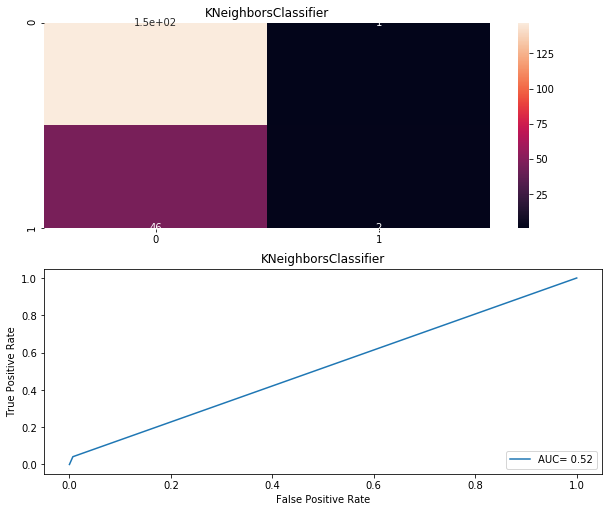

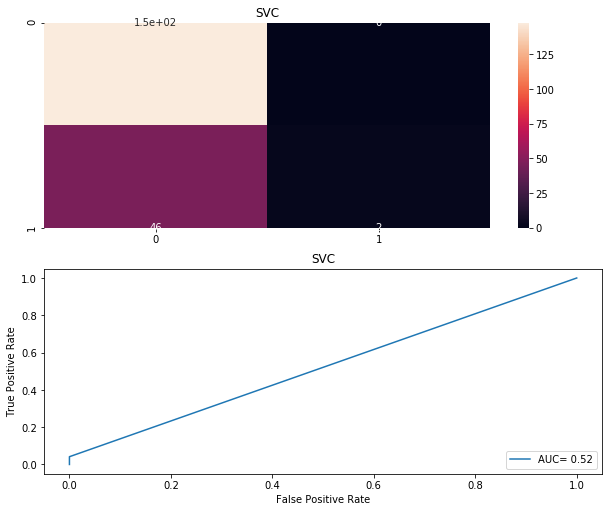

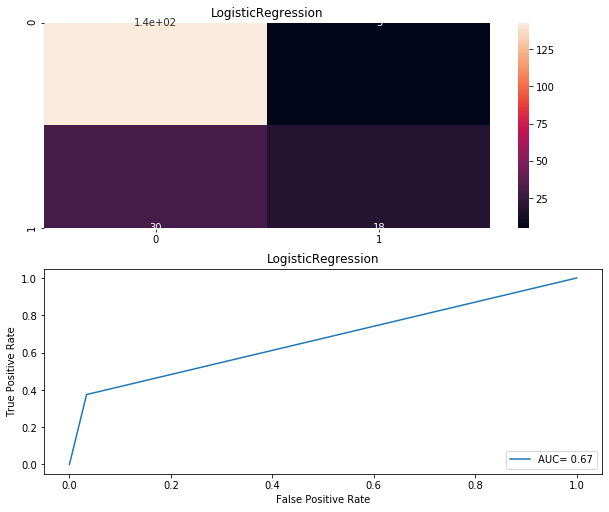

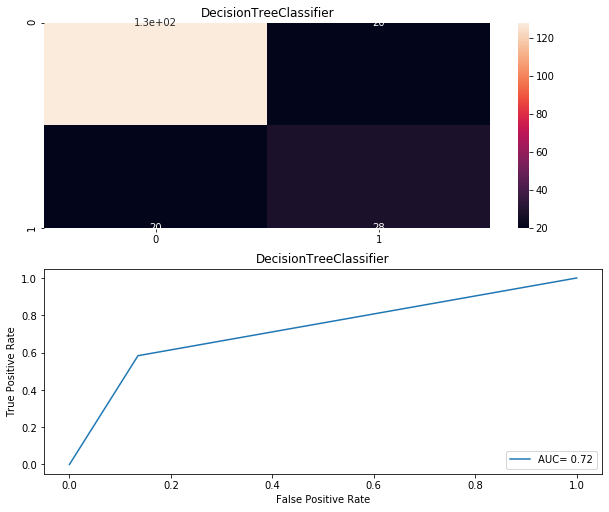

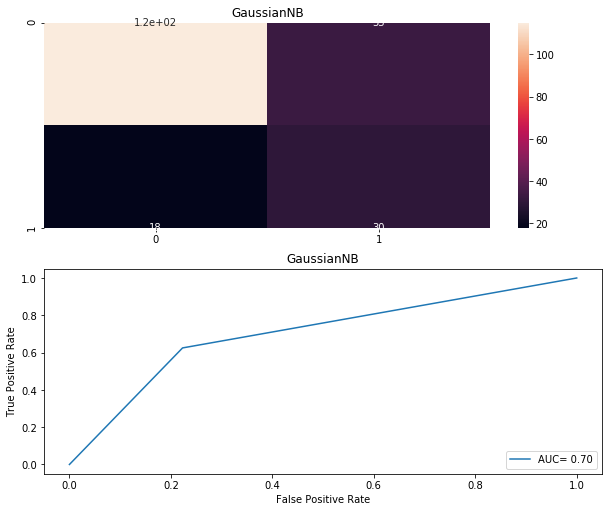

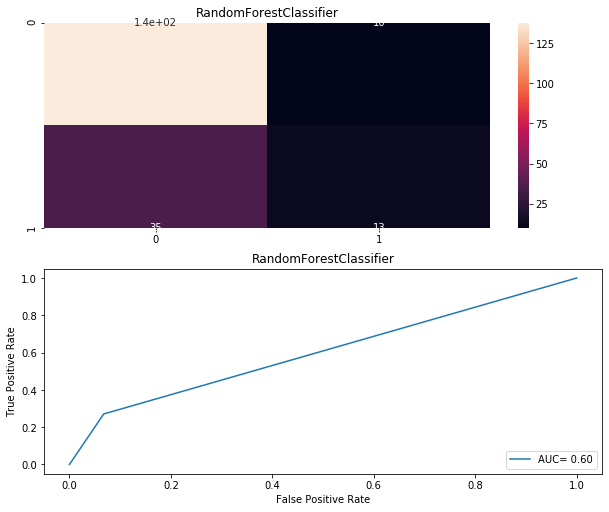

In [42]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('****************************',name,'********************************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train.values.ravel())
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score = ', AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_val_Score = ', sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc= auc(false_positive_rate, true_positive_rate)
    print('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label = 'AUC= %0.2f'%roc_auc)
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [43]:
result=pd.DataFrame({'Model': Model, 'Accuracy_score': score, 'Cross_val_score':cvs, 'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,76.020408,75.204082,51.745495
1,SVC,76.530612,75.102041,52.083333
2,LogisticRegression,82.142857,77.346939,67.060811
3,DecisionTreeClassifier,79.591837,76.938776,72.409910
4,GaussianNB,73.979592,71.020408,70.101351
5,RandomForestClassifier,77.040816,76.428571,60.163288
